## Homework
[课时33](http://study.163.com/course/courseLearn.htm?courseId=1050010#/learn/video?lessonId=1003346282&courseId=1050010)

In [21]:
# 3-1 求三维正交基, 已知A=(1, 2, 3) B=(1, 1, 1), 求AB所在平面和A垂直的向量
#!/usr/bin/python
# -*- coding: utf-8 -*-
from matplotlib import pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

from IPython.display import Latex, display

display(Latex(r"$I\hat{x} = (A^{T}A)^{-1}A^{T}C \quad Then: P = A\hat{x}$"))

<IPython.core.display.Latex object>

In [18]:
A = np.array([[1], [2], [3]])
B = np.array([[1], [1], [1]])

x = np.linspace(-0.5, 1, 10)
x.shape = (1, 10)
xx = A.dot(x)

TMP = A.T.dot(B)
AA = np.linalg.inv(A.T.dot(A))

# 对应最小二乘法的IX
P = A.dot(AA).dot(TMP)
E = B-P

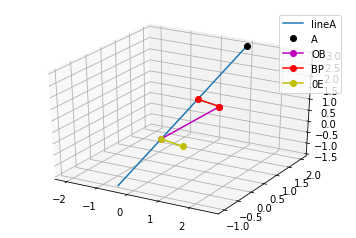

In [20]:
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot(xx[0,:], xx[1,:], xx[2,:], label="lineA")
ax.plot(A[0], A[1], A[2], 'ko', label="A")
ax.plot([0, B[0]], [0, B[1]], [0, B[2]], 'm-o', label="OB")
ax.plot([B[0][0],P[0][0]],[B[1][0],P[1][0]],[B[2][0],P[2][0]],'r-o',label="BP")
ax.plot([0,E[0]],[0,E[1]],[0,E[2]],'y-o',label="0E")

ax.legend()
ax.axis('equal')
plt.show()

LinAlgError: Singular matrix

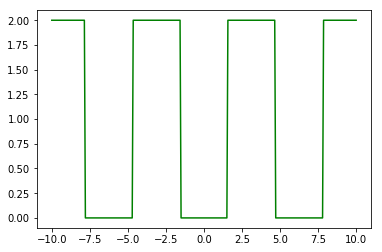

In [34]:
# homework 3-2 用正弦函数拟合方波, 傅里叶级数
#!/usr/bin/env python
# coding: utf-8
#copyRight by heibanke

import numpy as np
import matplotlib.pyplot as plt
import time

# 产生一个方波(x,y)
x = np.linspace(-10,10,300) 
y=[]
for i in np.cos(x):
    if i>0:
        y.append(0)
    else:
        y.append(2)
y=np.array(y)

def fourier(x, y, n):
    # TODO
    m = []
    for i in xrange(n):
        m.append(np.cos(i*x))
        m.append(np.sin(i*x))
    
    # np.mat可以直接用*做矩阵点乘, 否则需要A.dot(x)
    mx = np.mat(m).T
    
    y2 = y.reshape(y.shape[0], 1) - np.mean(y)
    w = np.linalg.inv(mx.T*mx)*mx.T*y2  # 拟合到y这条曲线上最近的点
    
    yw = np.array(mx*w) + np.mean(y)
    yw.shape = (yw.shape[0],)
    
    return yw

plt.plot(x,y,color='g',label='origin') 
plt.plot(x,fourier(x,y,3),color='r',label='3')
plt.plot(x,fourier(x,y,8),color='b',label='8')
plt.plot(x,fourier(x,y,23),color='k',label='23')

plt.legend()
plt.axis('equal')
plt.show()